In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Coursework/marketing_sample_for_trulia_com-real_estate__20190901_20191031__30k_data.csv")
df.columns

Index(['Uniq Id', 'Crawl Timestamp', 'Url', 'Title', 'Description', 'Price',
       'Image Url', 'Style', 'Sqr Ft', 'Longitude', 'Latitude', 'Home Id',
       'Lot Size', 'Beds', 'Bath', 'Year Built', 'Price Sqr Ft', 'Features',
       'Last Sold Year', 'Last Sold For', 'Last Tax Assestment',
       'Last Tax Year', 'Address', 'City', 'State', 'Zipcode', 'Property Type',
       'Address Full', 'Facts', 'Days On Trulia', 'Listing Agent Name',
       'Listing Agent Contact No', 'Agent Name 1', 'Agent Contact No 1',
       'Agent Name 2', 'Agent Contact No 2', 'Agent Name 3',
       'Agent Contact No 3', 'Agent Name 4', 'Agent Contact No 4',
       'Agent Name 5', 'Agent Contact No 5', 'Brokername', 'Image 1',
       'Image 2', 'Image 3', 'Image 4', 'Image 5', 'Image 6', 'Image 7',
       'Image 8', 'Image 9', 'Image 10', 'Image 11', 'Image 12', 'Image 13',
       'Image 14', 'Image 15', 'Image 16', 'Image 17', 'Image 18', 'Image 19',
       'Image 20', 'Image 21', 'Image 22', 'Image 23',

# Preprocessing #

In [ ]:
columns_to_drop = df.filter(regex=r'^Image\d+$|^Image.*|Image Url|Url|Trulia|Tax|Sold|Crawl Timestamp|Listing Agent Name|Listing Agent Contact No|Agent Name \d+|Agent Contact No \d+|Brokername').columns
df.drop(columns=columns_to_drop, inplace=True)
df.head()

,Uniq Id,Title,Description,Price,Style,Sqr Ft,Longitude,Latitude,Home Id,Lot Size,...,Year Built,Price Sqr Ft,Features,Address,City,State,Zipcode,Property Type,Address Full,Facts
0,d6521bac40600f17287f0a5a8b3efc8d,"630 W Echo Ln Phoenix, AZ 85021",NEW CONSTRUCTION in the North Central Corrido...,"$895,900",4 Beds / 4.5 Baths,"3,447 sqft",-112.081985,33.560055,3.259497e+09,"7,895 sqft",...,2019.0,$260/sqft,"Single Family Home | $260/sqft | Lot Size: 7,8...","630 W Echo Ln Phoenix, AZ 85021",Phoenix,AZ,85021.0,NaN,"630 W Echo Ln, Phoenix, AZ 85021","Lot Land | 7,895 sqft lot size | County: Maric..."
1,659d62537d940a76e3349bd39a72bd92,"2367 Highwood Dr Dallas, TX 75228",UPDATED EAST DALLAS HOME READY FOR MOVE-IN. H...,"$247,000",3 Beds / 2 Baths,"1,767 sqft",-96.676250,32.829227,1.067905e+09,"7,877 sqft",...,1954.0,$140/sqft,"Single Family Home | $140/sqft | Lot Size: 7,8...","2367 Highwood Dr Dallas, TX 75228",Dallas,TX,75228.0,NaN,"2367 Highwood Dr, Dallas, TX 75228","3 Beds | 2 Baths | 1,767 sqft | Single Family ..."
2,a003f7017e34b3c8486ffd54cecf9f0d,"30 Hurlock Ave Buffalo, NY 14211",This single-family home is located at 30 Hurl...,"$44,900",3 Beds / 1 Bath,"1,232 sqft",-78.825190,42.913000,5.060772e+09,"3,510 sqft",...,1900.0,$36/sqft,"Single Family Home | $36/sqft | Lot Size: 3,51...","30 Hurlock Ave Buffalo, NY 14211",Buffalo,NY,14211.0,NaN,"30 Hurlock Ave, Buffalo, NY 14211","3 Beds | 1 Bath | 1,232 sqft | Single Family H..."
3,bfee8b2ccc4ceaa91ebd92379b9ab73c,"6416 Alderton St Flushing, NY 11374","Beautiful semi detached, ranch type corner ho...","$959,000",3 Beds / 2 Baths,"1,417 sqft",-73.860170,40.722960,1.083661e+09,"2,598 sqft",...,1939.0,$677/sqft,"Single Family Home | $677/sqft | Lot Size: 2,5...","6416 Alderton St Flushing, NY 11374",Flushing,NY,11374.0,NaN,"6416 Alderton St, Flushing, NY 11374","1,417 sqft | Single Family Home | 2,598 sqft l..."
4,01078a918e94a5d7975c66f9f679727a,"251 NW 177th St #A-123 Miami Gardens, FL 33169","great investor opportunity!!! , beautiful stu...","$83,500",Studio / 1 Bath,440 sqft,-80.206314,25.937965,5.063919e+09,NaN,...,1971.0,$190/sqft,Condo | $190/sqft | $140/monthly HOA | Built i...,"251 NW 177th St #A-123 Miami Gardens, FL 33169",Miami Gardens,FL,33169.0,NaN,"251 NW 177th St #A-123, Miami Gardens, FL 33169",1 Bath | 440 sqft | Condo | Built in 1971 | Co...


In [ ]:
df.isnull().sum()

,0
Uniq Id,0
Title,0
Description,22
Price,0
Style,2369
Sqr Ft,2220
Longitude,0
Latitude,0
Home Id,2
Lot Size,4516


In [ ]:
import re
#sqr Ft, Price Sqr Ft, Price, Lot size
def extract_data(data):
    if pd.isna(data):  # Handle NaN
        return np.nan

    data = str(data).strip()  # Remove spaces
    data = data.replace(",", "")
    data = re.sub(r"[^0-9.]", "", data)  # Keep only digits and decimals

    return data if data else np.nan

def clean_lot_size(data):
    if pd.isna(data) or not isinstance(data, str):  # Handle NaN and non-string cases
        return np.nan

    data = data.replace(",", "").strip()  # Remove commas and trim spaces

    # Check if the value is in acres and convert to sqft
    if "acres" in data.lower():
        numeric_value = re.sub(r"[^0-9.]", "", data)  # Extract numeric part
        return float(numeric_value) * 43560  # Convert acres to sqft

    elif "sqft" in data.lower():
        return float(re.sub(r"[^0-9.]", "", data))  # Extract numeric part

    return np.nan  # Return NaN if no valid match is found

# Apply the functions to clean the columns
df['Sqr Ft'] = df['Sqr Ft'].apply(extract_data)
df['Price'] = df['Price'].apply(extract_data)
df['Price Sqr Ft'] = df['Price Sqr Ft'].apply(extract_data)
df['Lot Size'] = df['Lot Size'].apply(clean_lot_size)

# Convert the columns to numeric types (float or int)
df['Sqr Ft'] = pd.to_numeric(df['Sqr Ft'], errors='coerce')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Price Sqr Ft'] = pd.to_numeric(df['Price Sqr Ft'], errors='coerce')
df['Lot Size'] = pd.to_numeric(df['Lot Size'], errors='coerce')

# Handelling the null/Nan values

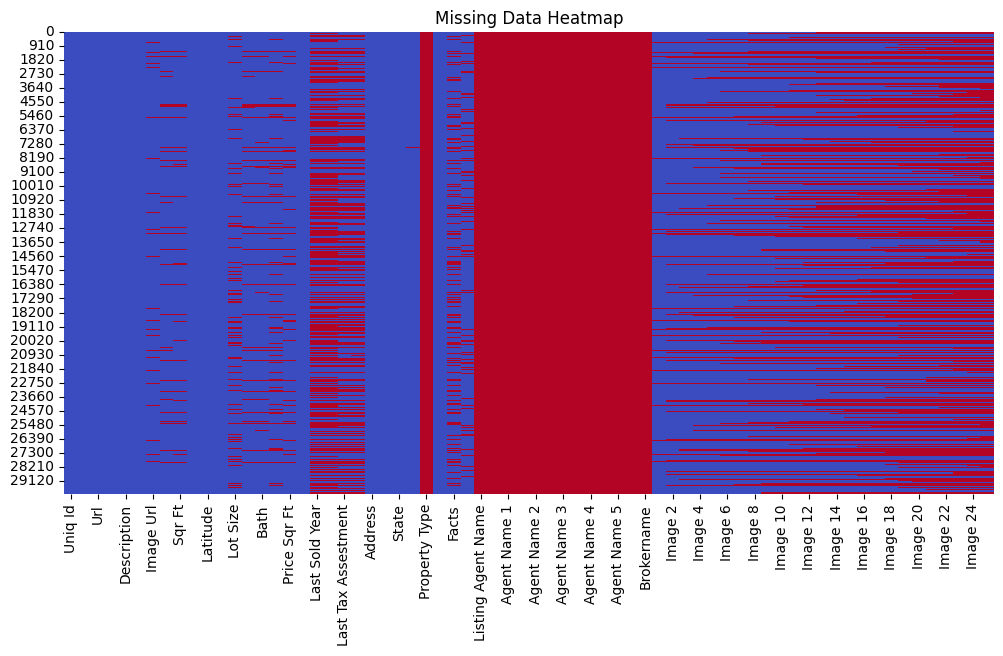

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap visualization
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cmap="coolwarm", cbar=False)
plt.title("Missing Data Heatmap")
plt.show()

In [ ]:
pip install missingno

**The correlation matrix bellow disply the correlation between columns and their missing values:**

<Axes: >

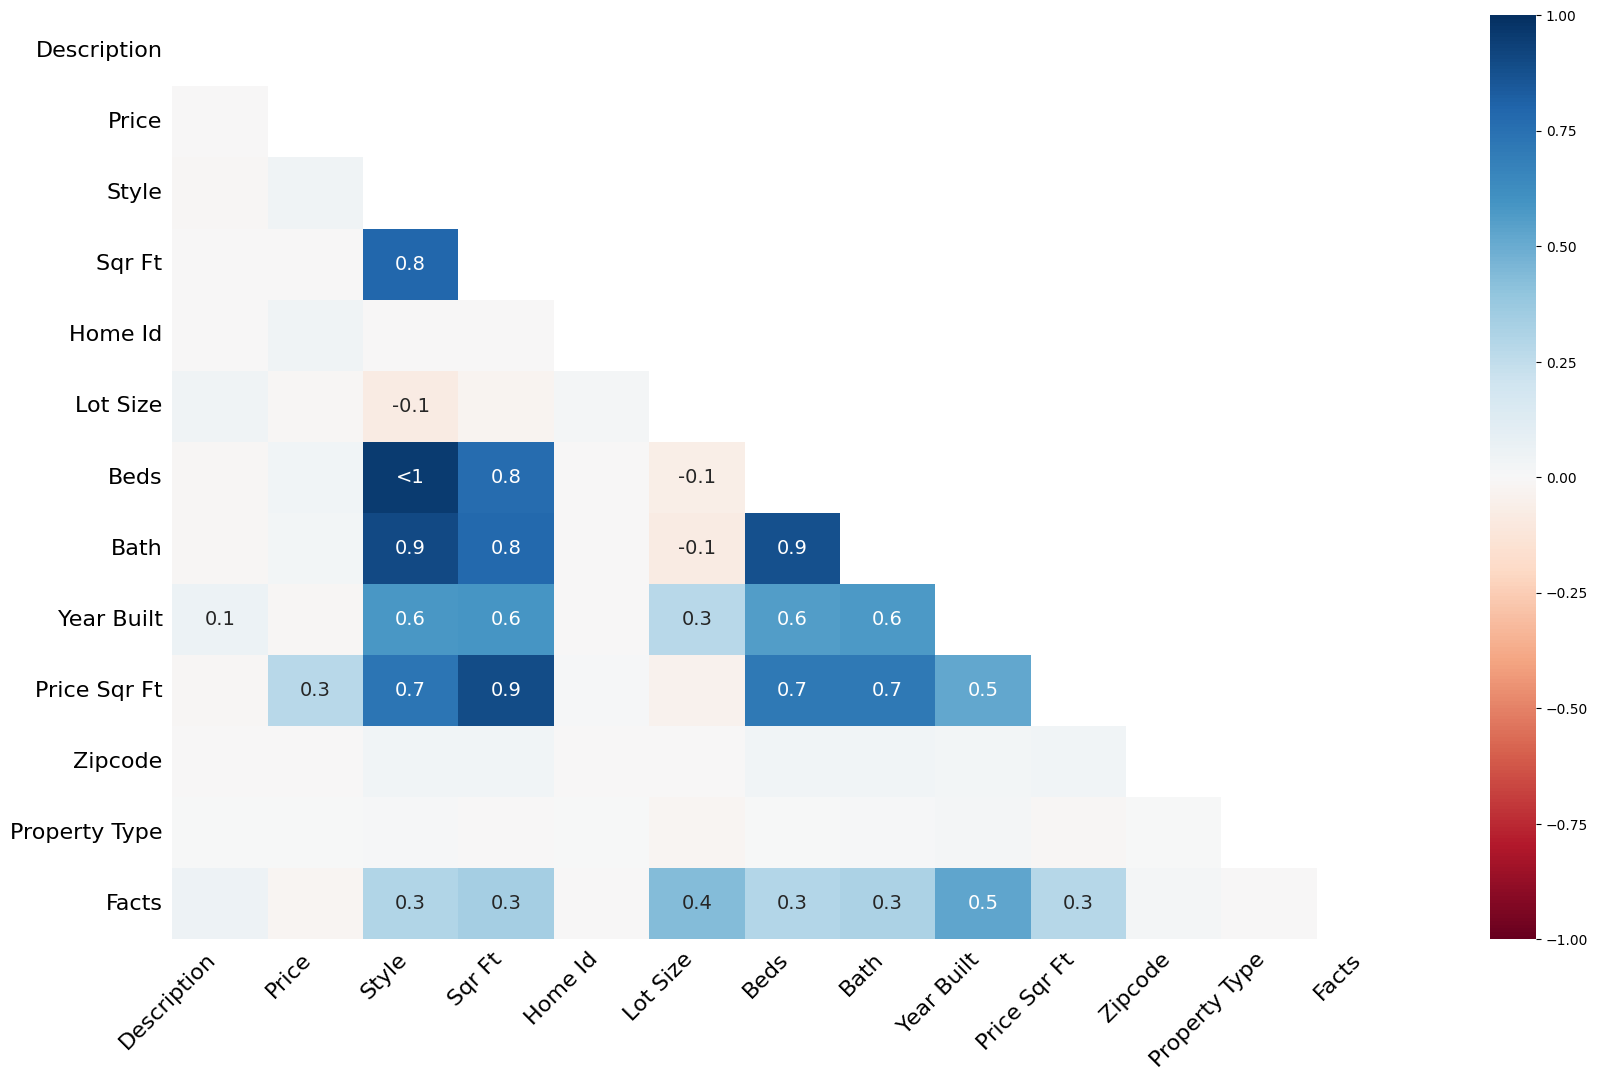

In [ ]:
import missingno as msno

msno.heatmap(df)

<ipython-input-21-cb2c3bcd00eb>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Lot Size'].fillna(data['Features'].apply(lambda x: extract_value(x, "Lot Size")), inplace=True)
<ipython-input-21-cb2c3bcd00eb>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

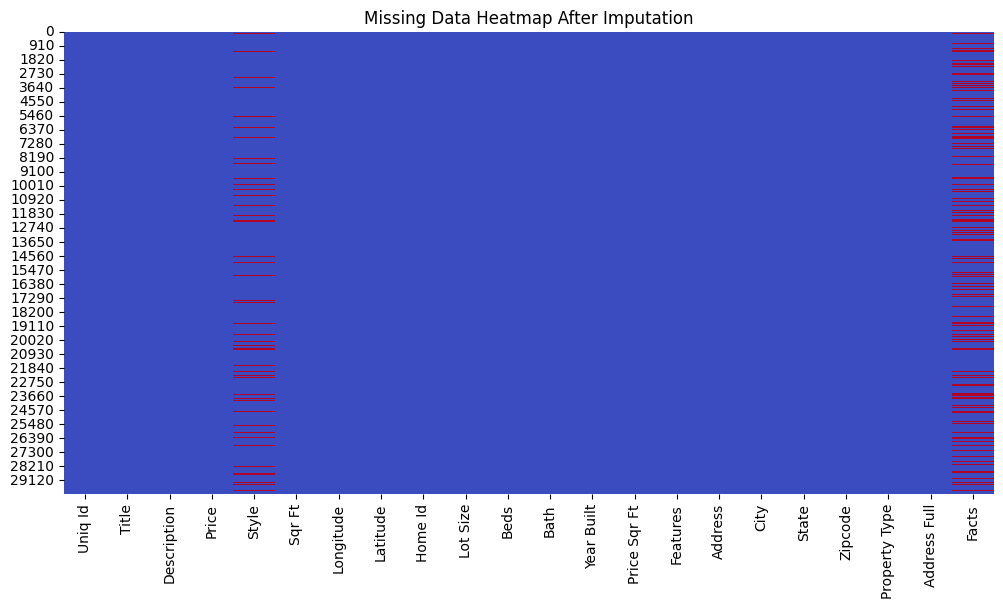

In [ ]:
import re
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier

# Sample dataset
data = df.copy()

# Extracting Missing Values from Text Columns
def extract_value(text, keyword):
    if pd.isna(text):
        return np.nan
    match = re.search(fr"{keyword}: (\d+)", text)
    return int(match.group(1)) if match else np.nan

data['Lot Size'].fillna(data['Features'].apply(lambda x: extract_value(x, "Lot Size")), inplace=True)
data['Year Built'].fillna(data['Features'].apply(lambda x: extract_value(x, "Built in")), inplace=True)

# Loop through each column you want to impute
for col in ['Price', 'Sqr Ft', 'Lot Size', 'Beds', 'Bath', 'Year Built','Price Sqr Ft']:
    data[col] = data[col].fillna(data.groupby('City')[col].transform('mean'))

# Incase there there are value in which we are unable to impute an AVG.
for col in ['Price', 'Sqr Ft', 'Lot Size', 'Beds', 'Bath', 'Year Built','Price Sqr Ft']:
  imputer = SimpleImputer(strategy='mean')
  data[col] = imputer.fit_transform(data[[col]])

# Function to extract property type
def extract_property_type(text):
    if pd.isna(text):
        return None
    match = re.search(r"^(Single Family Home|Condo|Townhouse|Multi-Family|Apartment)", text)
    return match.group(1) if match else None

# Apply extraction function row-wise across both columns
data['Property Type'] = data.apply(lambda x: extract_property_type(x['Features']) or extract_property_type(x['Facts']), axis=1)

knn_features = ['Beds', 'Bath', 'Sqr Ft', 'Lot Size', 'Year Built', 'Price']

# Extract missing and known data
missing_data = data[data['Property Type'].isna()]
known_data = data.dropna(subset=knn_features + ['Property Type'])

# 2. Impute missing values in knn_features for both known_data and missing_data
imputer = SimpleImputer(strategy='mean')  # or 'most_frequent', depending on your features

# Fit only on known_data
known_features_imputed = imputer.fit_transform(known_data[knn_features])
missing_features_imputed = imputer.transform(missing_data[knn_features])

# 3. Train KNN on known data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(known_features_imputed, known_data['Property Type'])

# 4. Predict missing values
predicted_values = knn.predict(missing_features_imputed)
data.loc[data['Property Type'].isna(), 'Property Type'] = predicted_values


plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cmap="coolwarm", cbar=False)
plt.title("Missing Data Heatmap After Imputation")
plt.show()


In [ ]:
print(data.isna().sum())

Uniq Id             0
Title               0
Description        22
Price               0
Style            2369
Sqr Ft              0
Longitude           0
Latitude            0
Home Id             2
Lot Size            0
Beds                0
Bath                0
Year Built          0
Price Sqr Ft        0
Features            0
Address             0
City                0
State               0
Zipcode             3
Property Type       0
Address Full        0
Facts            6968
dtype: int64


In [ ]:
data.drop(columns=['Facts','Style'], inplace=True)
data.dropna(inplace=True)
data.shape

(29979, 20)

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Ensure stopwords and lemmatization resources are downloaded
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Function to normalize text
def normalize_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()  # Lowercasing
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    tokens = word_tokenize(text, language='english', preserve_line=True)  # Tokenization
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Stopword removal
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return " ".join(tokens)

# Apply normalization to text columns
data['Normalized Description'] = data['Description'].apply(normalize_text)
data['Normalized Features'] = data['Features'].apply(normalize_text)

data.to_csv('data.csv', index=False)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


KeyboardInterrupt: 

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Coursework/data.csv')

In [ ]:
address = list(data['Address'].value_counts())  # Convert value counts to a list
address_length = len(address)  # Use len() to find the length
print(address_length)

zipcode = list(data['Zipcode'].value_counts())  # Convert value counts to a list
zipcode_length = len(zipcode)  # Use len() to find the length
print(zipcode_length)

29937
2510


In [ ]:
pip install pygeohash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.8 MB/s eta 0:00:00


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pygeohash as pgh

categorical_columns = ['Property Type', 'State', 'City']  # Adjusted for actual categorical fields

data[categorical_columns] = data[categorical_columns].fillna('Unknown')  # Fill missing values
ohe = OneHotEncoder(sparse_output=True, handle_unknown='ignore')
encoded_cats = ohe.fit_transform(data[categorical_columns])

# Apply geohash to each row
data['geohash'] = data.apply(lambda row: pgh.encode(row['Latitude'], row['Longitude'], precision=5), axis=1)

# encode geohash as category index or embedding
data['geohash_id'] = data['geohash'].astype('category').cat.codes

# Define numerical columns and standardize them
numerical_columns = ['Price', 'Sqr Ft', 'Lot Size', 'Beds', 'Bath', 'Year Built','Price Sqr Ft']
sc = StandardScaler()
scaled_num = sc.fit_transform(data[numerical_columns].fillna(0))  #transofroms and  missing values

data['Normalized Features'] = data['Normalized Features'].fillna("").astype(str)

# encode the text within the Features column.
tfidf = TfidfVectorizer(min_df=2, ngram_range=(1, 2), stop_words='english')
feature_embeddings = tfidf.fit_transform(data['Normalized Features'])

print(data.head())


                            Uniq Id  \
0  d6521bac40600f17287f0a5a8b3efc8d   
1  659d62537d940a76e3349bd39a72bd92   
2  a003f7017e34b3c8486ffd54cecf9f0d   
3  bfee8b2ccc4ceaa91ebd92379b9ab73c   
4  01078a918e94a5d7975c66f9f679727a   

                                              Title  \
0                  630 W Echo Ln Phoenix, AZ 85021    
1                2367 Highwood Dr Dallas, TX 75228    
2                 30 Hurlock Ave Buffalo, NY 14211    
3              6416 Alderton St Flushing, NY 11374    
4   251 NW 177th St #A-123 Miami Gardens, FL 33169    

                                         Description     Price  Sqr Ft  \
0   NEW CONSTRUCTION in the North Central Corrido...  895900.0  3447.0   
1   UPDATED EAST DALLAS HOME READY FOR MOVE-IN. H...  247000.0  1767.0   
2   This single-family home is located at 30 Hurl...   44900.0  1232.0   
3   Beautiful semi detached, ranch type corner ho...  959000.0  1417.0   
4   great investor opportunity!!! , beautiful stu...   83500.0  

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

data.describe()

,Price,Sqr Ft,Longitude,Latitude,Home Id,Lot Size,Beds,Bath,Year Built,Price Sqr Ft,Zipcode
count,2.997900e+04,2.997900e+04,29979.000000,29979.000000,2.997900e+04,2.997900e+04,29979.000000,29979.000000,29979.000000,2.997900e+04,29979.000000
mean,5.289252e+05,5.259865e+03,-95.169192,36.160380,3.902954e+09,9.157893e+04,3.289924,2.580397,1974.272092,3.957134e+02,59357.742119
std,1.137670e+06,2.426687e+05,15.456083,5.501183,1.394042e+09,4.519392e+06,1.410963,1.392468,32.905846,9.605689e+03,27208.028943
min,1.000000e+00,1.000000e+00,-150.047160,25.550295,3.054900e+04,1.000000e+00,1.000000,0.750000,1800.000000,0.000000e+00,2108.000000
25%,1.864750e+05,1.324000e+03,-106.744440,32.747538,3.121473e+09,4.896500e+03,3.000000,2.000000,1952.000000,1.210000e+02,33137.000000
50%,3.099900e+05,1.856073e+03,-93.393970,36.017730,5.028912e+09,7.904000e+03,3.000000,2.162162,1980.373134,1.680000e+02,68127.000000
75%,5.320035e+05,2.541000e+03,-81.638335,40.020192,5.060887e+09,1.568160e+04,4.000000,3.000000,2002.000000,2.690000e+02,85016.000000
max,6.000000e+07,3.600380e+07,-70.997740,61.442024,5.064292e+09,5.502665e+08,65.000000,98.000000,2019.000000,1.100000e+06,99587.000000


/tmp/ipython-input-19-2914347874.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index, y=state_counts.values, palette='coolwarm')


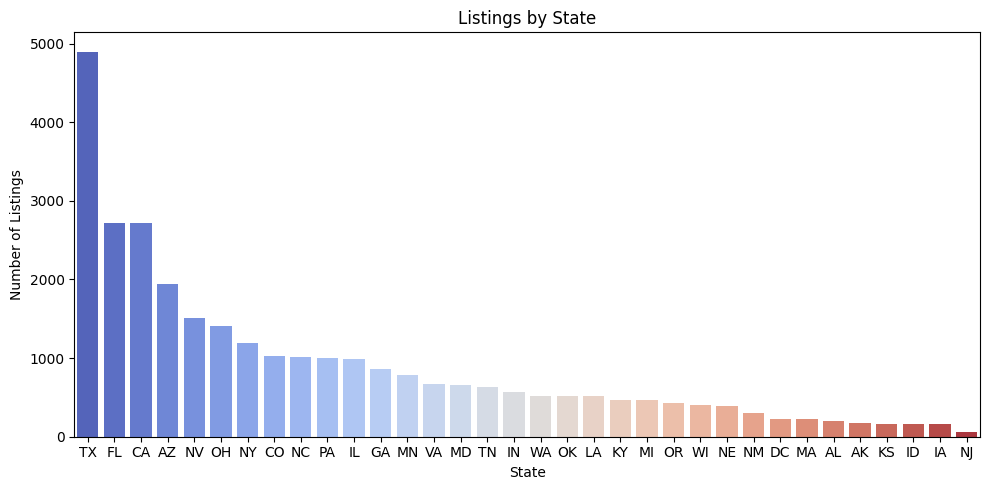

In [ ]:
state_counts = df['State'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=state_counts.index, y=state_counts.values, palette='coolwarm')
plt.title("Listings by State")
plt.xlabel("State")
plt.ylabel("Number of Listings")
plt.tight_layout()
plt.show()


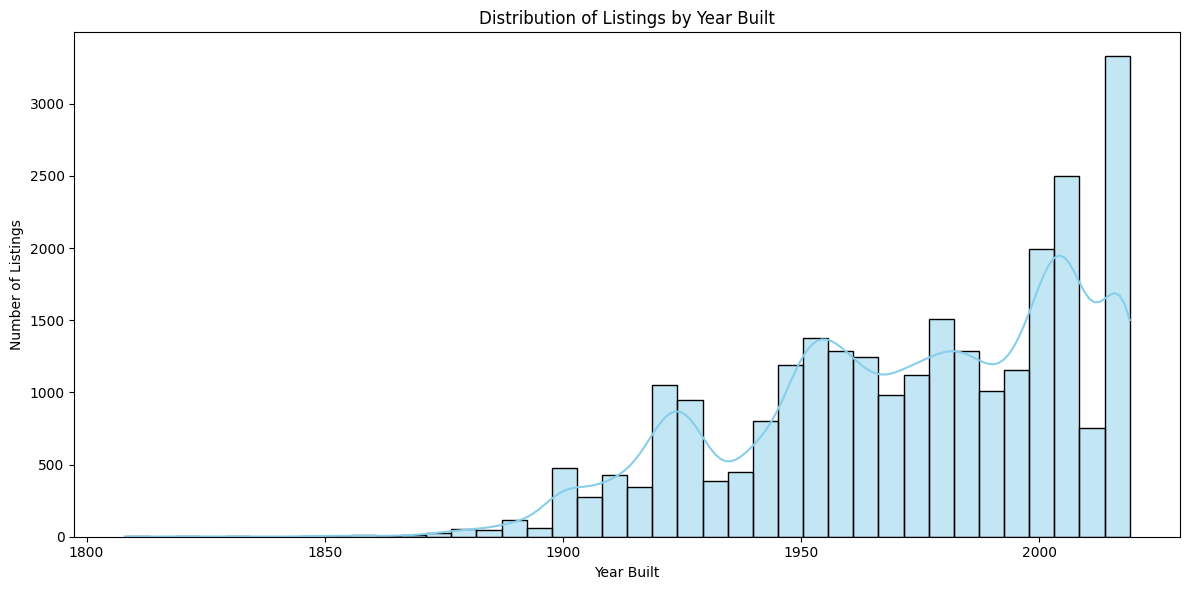

In [ ]:
df_years = df[df['Year Built'].notnull() & (df['Year Built'] > 1800)]

plt.figure(figsize=(12, 6))
sns.histplot(df_years['Year Built'], bins=40, kde=True, color='skyblue')
plt.title("Distribution of Listings by Year Built")
plt.xlabel("Year Built")
plt.ylabel("Number of Listings")
plt.tight_layout()
plt.show()



# Design and model training #

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Coursework/data.csv')
data.columns

Index(['Uniq Id', 'Title', 'Description', 'Price', 'Sqr Ft', 'Longitude',
       'Latitude', 'Home Id', 'Lot Size', 'Beds', 'Bath', 'Year Built',
       'Price Sqr Ft', 'Features', 'Address', 'City', 'State', 'Zipcode',
       'Property Type', 'Address Full', 'Normalized Description',
       'Normalized Features'],
      dtype='object')

In [ ]:
pip install 'tensorflow[and-cuda]'

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_vocab = 10000
max_len = 100

# Ensure all descriptions are strings and fill missing values
data['Normalized Description'] = data['Normalized Description'].fillna('').astype(str)

tokenizer = Tokenizer(num_words=max_vocab, oov_token="<OOV>")
tokenizer.fit_on_texts(data['Normalized Description'])

sequences = tokenizer.texts_to_sequences(data['Normalized Description'])
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')



In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, GlobalAveragePooling1D

embedding_dim = 128
max_len = 100

input_text = Input(shape=(max_len,))
x = Embedding(input_dim=max_vocab, output_dim=embedding_dim, input_length=max_len)(input_text)
x = LSTM(64, return_sequences=True)(x)
x = GlobalAveragePooling1D()(x)

model = Model(inputs=input_text, outputs=x)
description_embeddings = model.predict(padded_sequences, batch_size=32)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


937/937 ━━━━━━━━━━━━━━━━━━━━ 35s 37ms/step


In [ ]:
from scipy.sparse import hstack, csr_matrix

data_combined = hstack([
    csr_matrix(description_embeddings),
    csr_matrix(scaled_num),
    encoded_cats,
    csr_matrix(np.array(data['geohash_id']).reshape(-1, 1))
])

print("Final input shape:", data_combined.shape)
np.save('combined_features_2.npz', data_combined)

NameError: name 'description_embeddings' is not defined

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

processed_data = np.load('/content/drive/MyDrive/Colab Notebooks/Coursework/combined_features_2.npy', allow_pickle=True)
processed_data = processed_data.item()  # Extract the sparse matrix from the loaded object


In [ ]:
import random
from itertools import combinations
import numpy as np


def create_pairs(df, num_pairs=50000, threshold=0.7, max_pairs_per_anchor=100):
    pairs = []
    labels = []
    anchor_pair_counts = {}

    # Define capped thresholds to reduce outlier influence
    capped_thresholds = {
        'Price': 500000,       # reasonable similarity range
        'Sqr Ft': 1500,        # homes within 1500 sqft are similar
        'Year Built': 10       # built within a decade
    }

    # Precompute state-wise stds as backup
    state_stats = df.groupby('State').agg({
        'Price': 'std',
        'Sqr Ft': 'std',
        'Year Built': 'std'
    }).fillna(0)

    state_groups = df.groupby('State').groups

    # -------- Positive Pairs --------
    for state, indices in state_groups.items():
        state_df = df.loc[indices]
        if len(state_df) < 2:
            continue

        for i, j in combinations(state_df.index, 2):
            anchor_idx = df.index.get_loc(i)
            pos_idx = df.index.get_loc(j)

            if anchor_pair_counts.get(anchor_idx, 0) >= max_pairs_per_anchor or \
               anchor_pair_counts.get(pos_idx, 0) >= max_pairs_per_anchor:
                continue

            anchor = df.loc[i]
            pos = df.loc[j]

            constraints_passed = 0
            total_constraints = 7

            # --- Constraint checks in priority order ---
            if abs(anchor['Price'] - pos['Price']) <= capped_thresholds['Price']:
                constraints_passed += 1.5

            if abs(anchor['Sqr Ft'] - pos['Sqr Ft']) <= capped_thresholds['Sqr Ft']:
                constraints_passed += 1.5

            if anchor['Property Type'] == pos['Property Type']:
                constraints_passed += 1

            if abs(anchor['Year Built'] - pos['Year Built']) <= capped_thresholds['Year Built']:
                constraints_passed += 1

            if abs(anchor['Beds'] - pos['Beds']) <= 1:
                constraints_passed += 1

            if abs(anchor['Bath'] - pos['Bath']) <= 1:
                constraints_passed += 1

            sim_score = constraints_passed / total_constraints

            if sim_score >= threshold:
                pairs.append((anchor_idx, pos_idx))
                labels.append(sim_score)
                anchor_pair_counts[anchor_idx] = anchor_pair_counts.get(anchor_idx, 0) + 1
                anchor_pair_counts[pos_idx] = anchor_pair_counts.get(pos_idx, 0) + 1

    # -------- Sampling Positives --------
    if len(pairs) >= num_pairs // 2:
        selected = random.sample(list(enumerate(pairs)), num_pairs // 2)
        selected_indices, sampled_pairs = zip(*selected)
        labels = [labels[i] for i in selected_indices]
        pairs = list(sampled_pairs)
    else:
        num_pairs = len(pairs) * 2

    # -------- Negative Pairs --------
    neg_pairs_needed = num_pairs - len(pairs)
    neg_pairs = []
    neg_labels = []

    while len(neg_pairs) < neg_pairs_needed:
        i, j = random.sample(range(len(df)), 2)
        anchor = df.iloc[i]
        neg = df.iloc[j]
        anchor_idx, neg_idx = i, j

        if anchor_pair_counts.get(anchor_idx, 0) >= max_pairs_per_anchor or \
           anchor_pair_counts.get(neg_idx, 0) >= max_pairs_per_anchor:
            continue

        constraints_passed = 0
        total_constraints = 7

        # --- Constraint checks in priority order ---
        if abs(anchor['Price'] - pos['Price']) <= capped_thresholds['Price']:
            constraints_passed += 1.5

        if abs(anchor['Sqr Ft'] - pos['Sqr Ft']) <= capped_thresholds['Sqr Ft']:
            constraints_passed += 1.5

        if anchor['Property Type'] == pos['Property Type']:
            constraints_passed += 1

        if abs(anchor['Year Built'] - pos['Year Built']) <= capped_thresholds['Year Built']:
            constraints_passed += 1

        if abs(anchor['Beds'] - pos['Beds']) <= 1:
            constraints_passed += 1

        if abs(anchor['Bath'] - pos['Bath']) <= 1:
            constraints_passed += 1

        sim_score = constraints_passed / total_constraints

        if sim_score < threshold:
            neg_pairs.append((anchor_idx, neg_idx))
            neg_labels.append(sim_score)
            anchor_pair_counts[anchor_idx] = anchor_pair_counts.get(anchor_idx, 0) + 1
            anchor_pair_counts[neg_idx] = anchor_pair_counts.get(neg_idx, 0) + 1

    # -------- Combine & Return --------
    pairs.extend(neg_pairs[:neg_pairs_needed])
    labels.extend(neg_labels[:neg_pairs_needed])
    return pairs, labels


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Lambda
from keras.layers import Input, Dense, Subtract, Dropout
from keras.models import Model
import tensorflow.keras.backend as K

def create_embedding_model(input_dim):
    input = Input(shape=(input_dim,))
    x = Dense(128, activation='relu')(input)
    x = Dropout(0.3)(x)
    x = Dense(64, activation='relu')(x)
    x = Dense(32, activation='linear')(x)
    x = Lambda(lambda t: K.l2_normalize(t, axis=1), output_shape=lambda s: s)(x)
    return Model(input, x)

# Create the embedding model
input_dim = processed_data.shape[1]  # Number of features in `data_combined`
embedding_net = create_embedding_model(input_dim)

# Inputs for Siamese network (two combined feature vectors)
input_a = Input(shape=(input_dim,))
input_b = Input(shape=(input_dim,))

# Embeddings for each input
embedding_a = embedding_net(input_a)
embedding_b = embedding_net(input_b)

# Similarity function
def cosine_distance(vects):
    x, y = vects
    return 1 - K.sum(x * y, axis=1, keepdims=True)

# Compute distance between the embeddings and output it.
distance = Lambda(cosine_distance, output_shape=(1,))([embedding_a, embedding_b])

# Define Siamese model
siamese_model = Model(inputs=[input_a, input_b], outputs=distance )

# Loss function:
def contrastive_loss(y_true, y_pred):
    margin = 1
    return K.mean(y_true * K.square(y_pred) +
                  (1 - y_true) * K.square(K.maximum(margin - y_pred, 0)))

# Compile the model
siamese_model.compile(optimizer='adam', loss=contrastive_loss)

# Print model summary
embedding_net.summary()
siamese_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_2 (Lambda)               │ (None, 32)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,816 (432.88 KB)

 Trainable params: 110,816 (432.88 KB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 784)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_5       │ (None, 784)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional_2        │ (None, 32)        │    110,816 │ input_layer_4[0]… │
│ (Functional)        │                   │            │ input_layer_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_3 (Lambda)   │ (None, 1)         │          0 │ functional_2[0][… │
│                     │                   │            │ functional_2[1][… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 110,816 (432.88 KB)

 Trainable params: 110,816 (432.88 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
pairs, scores = create_pairs(data)

In [ ]:
import pickle

# Save to file
with open("pairs_and_scores.pkl", "wb") as f:
    pickle.dump((pairs, scores), f)

50000
50000


In [ ]:
import pickle
with open("/content/drive/MyDrive/Colab Notebooks/Coursework/pairs_and_scores.pkl", "rb") as f:
    pairs, scores = pickle.load(f)

print(len(pairs))
print(len(scores))

50000
50000


In [ ]:
from sklearn.utils import shuffle, resample
from sklearn.model_selection import train_test_split
from collections import Counter


X_a = processed_data[[i for i, _ in pairs]]
X_b = processed_data[[j for _, j in pairs]]
y_all = np.array(scores)

# Define positives as pairs with similarity >= threshold
pos_idx = [i for i, score in enumerate(scores) if score >= 0.8]
neg_idx = [i for i, score in enumerate(scores) if score < 0.8]

# Safety check
if len(pos_idx) == 0 or len(neg_idx) == 0:
    raise ValueError("Not enough positive or negative samples. Check your `create_pairs` logic.",len(neg_idx))

# Sample negatives to match number of positives
n_sample = min(len(neg_idx), len(pos_idx))
neg_idx_sampled = resample(neg_idx, replace=False, n_samples=n_sample, random_state=42)
pos_idx_sampled = resample(pos_idx, replace=False, n_samples=n_sample, random_state=42)

# Combine and shuffle
balanced_idx = pos_idx_sampled + neg_idx_sampled
X_a_bal = X_a[balanced_idx]
X_b_bal = X_b[balanced_idx]
y_bal = np.array([scores[i] for i in balanced_idx])

X_a_bal, X_b_bal, y_bal = shuffle(X_a_bal, X_b_bal, y_bal, random_state=42)

# Split into train/test
X_a_train, X_a_test, X_b_train, X_b_test, y_train, y_test = train_test_split(
    X_a_bal, X_b_bal, y_bal, test_size=0.2, random_state=42
)

In [ ]:
# Train Siamese model with train/test split
siamese_model.fit(
    [X_a_train, X_b_train],
    y_train,
    batch_size=64,
    epochs= 30,
    validation_data=([X_a_test, X_b_test], y_test)
)

Epoch 1/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 0.2186 - val_loss: 0.2926
Epoch 2/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.2135 - val_loss: 0.2878
Epoch 3/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.2127 - val_loss: 0.2847
Epoch 4/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.2115 - val_loss: 0.2805
Epoch 5/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.2079 - val_loss: 0.2729
Epoch 6/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.2032 - val_loss: 0.2430
Epoch 7/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.1987 - val_loss: 0.2397
Epoch 8/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1956 - val_loss: 0.2314
Epoch 9/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.1942 - val_loss: 0.2282
Epoch 10/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.1947 - val_loss: 0.2258
Epoch 11/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.1933 - val_loss: 0.2421
Epoch 12/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/

# Recommendation function: #

In [ ]:
# Generate embeddings
embedding_net.set_weights(siamese_model.get_layer(index=2).get_weights())
model_embeddings = embedding_net.predict(processed_data, batch_size=256)
embedding_net.save("embedding_net.keras")

118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute pairwise similarity on the learned embeddings
embedding_similarity = cosine_similarity(model_embeddings)
embedding_similarity.shape

(29979, 29979)

In [ ]:
def recommend(id_, quantity_similar_items, similarity_matrix, df_raw, df_C):
    """Return the most similar listings based on Siamese-learned embeddings."""

    required_columns = ['Uniq Id']
    for col in required_columns:
        if col not in df_raw.columns:
            raise ValueError(f"Column '{col}' is required in the dataset.")

    similar_listing_ids = []
    df_raw.reset_index(drop=True, inplace=True)

    # Locate the index for the given ID
    try:
        idx = df_C.loc[df_raw['Uniq Id'] == id_].index[0]
    except IndexError:
        print(f"Error: ID {id_} not found in the dataset.")
        return None, None

    # Use Siamese-based similarity
    score_series = pd.Series(similarity_matrix[idx]).sort_values(ascending=False)
    df_raw.loc[score_series.index, 'Score'] = score_series

    # Filter by same city, exclude itself
    top_indexes = list(score_series.index)
    for i in top_indexes:
        if df_raw['City'][idx] == df_raw['City'][i] and df_raw['Uniq Id'][idx] != df_raw['Uniq Id'][i]:
            similar_listing_ids.append(i)

    if not similar_listing_ids:
        return None, df_raw.iloc[idx]

    return df_raw.iloc[similar_listing_ids][:quantity_similar_items], df_raw.iloc[idx]

recommend('d6521bac40600f17287f0a5a8b3efc8d', 7, embedding_similarity, data, data)

(                                Uniq Id  \
 13635  29c378b0df08a9578a28a84b00f2953d   
 1615   0adcd3fa674e0b94bceeec961b0fccb4   
 18659  f31671136c9b20d9f601f3d4c781e6b9   
 13426  6ab64cab854c87f89f11566e7dc18ef6   
 23835  adae2802fd8023f76a4ec2cb5edb3942   
 16271  e14f8eb756ff1e30ea12b215c0b79bbb   
 5560   c142630c970e8478d0ec1194b06c64a4   
 
                                               Title  \
 13635           1712 W Briles Rd Phoenix, AZ 85085    
 1615           3015 E Branham Ln Phoenix, AZ 85042    
 18659   2806 W Harvest Groves Ln Phoenix, AZ 85041    
 13426           303 E Wexford Cv Phoenix, AZ 85020    
 23835        3774 E Ringtail Way Phoenix, AZ 85050    
 16271        27 W Quartz Rock Rd Phoenix, AZ 85085    
 5560              6288 N 31st St Phoenix, AZ 85016    
 
                                              Description      Price  Sqr Ft  \
 13635   WOW! Your dream house!!! Brand new 2019 built...   850000.0  3300.0   
 1615    Quality and Style in a magn

In [ ]:
pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 52.6 MB/s eta 0:00:00


In [ ]:
import faiss
import pickle
import numpy as np

# # Assume all_embeddings is a numpy array of shape (num_listings, embedding_dim)
all_embeddings = np.array(model_embeddings).astype('float32')
faiss.normalize_L2(all_embeddings)  # Normalize for cosine similarity

# Build index (inner product for cosine similarity of normalized vectors)
index = faiss.IndexFlatIP(all_embeddings.shape[1])
index.add(all_embeddings)

In [ ]:
with open("all_embeddings.pkl", "wb") as f:
    pickle.dump(all_embeddings, f)

# Save index
faiss.write_index(index, "faiss_index.index")

In [ ]:
import pickle
import faiss
import numpy as np

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Coursework/data.csv')

# Load embeddings
with open("/content/drive/MyDrive/Colab Notebooks/Coursework/all_embeddings_2.pkl", "rb") as f:
    all_embeddings = pickle.load(f)

# Load index later
index = faiss.read_index("/content/drive/MyDrive/Colab Notebooks/Coursework/faiss_index_2.index")


def recommend_with_preferences_faiss(
    id_, quantity_similar_items, all_embeddings, index,
    df_raw, df_C, user_weights=None, alpha=0.7
):
    """Return personalized recommendations using FAISS and optional user preferences."""
    df_raw = df_raw.copy()
    df_raw.reset_index(drop=True, inplace=True)

    # Step 1: Get index of the query item
    try:
        idx = df_C.loc[df_raw['Uniq Id'] == id_].index[0]
    except IndexError:
        print(f"Error: ID {id_} not found.")
        return None, None

    # Step 2: Get query embedding and normalize
    query_embedding = np.array(all_embeddings[idx]).astype('float32').reshape(1, -1)
    faiss.normalize_L2(query_embedding)

    # Step 3: Search top candidates
    D, I = index.search(query_embedding, k=quantity_similar_items + 20)  # retrieve more for later filtering
    top_indices = I[0]
    top_scores = D[0]

    # Step 4: Build DataFrame with results
    results_df = df_raw.iloc[top_indices].copy()
    results_df['Similarity'] = top_scores

    # Step 5: Filter same city, not itself
    base_city = df_raw.iloc[idx]['City']
    results_df = results_df[
        (results_df['City'] == base_city) &
        (results_df['Uniq Id'] != id_)
    ]

    # Step 6: Apply user preferences
    if user_weights is not None:
        preference_features = results_df[['Price', 'Sqr Ft', 'Lot Size', 'Beds', 'Bath', 'Year Built','Price Sqr Ft']]
        preference_scores = preference_features.dot(user_weights)
        results_df['PrefScore'] = preference_scores
        results_df['FinalScore'] = alpha * results_df['Similarity'] + (1 - alpha) * results_df['PrefScore']
    else:
        results_df['FinalScore'] = results_df['Similarity']

    # Step 8: Sort and return top results
    top_sorted = results_df.sort_values('FinalScore', ascending=False)
    return top_sorted.head(quantity_similar_items), df_raw.iloc[idx]

recommend_with_preferences_faiss('d6521bac40600f17287f0a5a8b3efc8d', 7, all_embeddings, index, data, data)

(                                Uniq Id  \
 13635  29c378b0df08a9578a28a84b00f2953d   
 1615   0adcd3fa674e0b94bceeec961b0fccb4   
 18659  f31671136c9b20d9f601f3d4c781e6b9   
 13426  6ab64cab854c87f89f11566e7dc18ef6   
 23835  adae2802fd8023f76a4ec2cb5edb3942   
 16271  e14f8eb756ff1e30ea12b215c0b79bbb   
 
                                               Title  \
 13635           1712 W Briles Rd Phoenix, AZ 85085    
 1615           3015 E Branham Ln Phoenix, AZ 85042    
 18659   2806 W Harvest Groves Ln Phoenix, AZ 85041    
 13426           303 E Wexford Cv Phoenix, AZ 85020    
 23835        3774 E Ringtail Way Phoenix, AZ 85050    
 16271        27 W Quartz Rock Rd Phoenix, AZ 85085    
 
                                              Description     Price  Sqr Ft  \
 13635   WOW! Your dream house!!! Brand new 2019 built...  850000.0  3300.0   
 1615    Quality and Style in a magnificent setting! Q...  710000.0  4351.0   
 18659   Homes in this highly sought after community d...  

# Recommendation system Evaluation: #

## Percision: ##


In [ ]:

def get_relevant_items_for_listing(target_id, pairs, scores, df, threshold=0.65):
    df = df.reset_index(drop=True)

    try:
        target_idx = df[df['Uniq Id'] == target_id].index[0]
    except IndexError:
        print(f"ID {target_id} not found.")
        return []

    relevant_indices = [
        candidate_idx for (anchor_idx, candidate_idx), score in zip(pairs, scores)
        if anchor_idx == target_idx and score >= threshold
    ]

    return df.loc[relevant_indices]['Uniq Id'].tolist()

def relevancy_check(target_id, recc_id, df):
    try:
        anchor = df[df['Uniq Id'] == target_id].iloc[0]
    except IndexError:
        print(f"ID {target_id} not found.")
        return 0

    try:
        pos = df[df['Uniq Id'] == recc_id].iloc[0]
    except IndexError:
        print(f"ID {recc_id} not found.")
        return 0

    capped_thresholds = {
        'Price': 500000,       # reasonable similarity range
        'Sqr Ft': 1500,        # homes within 1500 sqft are similar
        'Year Built': 10       # built within a decade
    }

    constraints_passed = 0
    total_constraints = 7

    # --- Constraint checks in priority order ---
    if abs(anchor['Price'] - pos['Price']) <= capped_thresholds['Price']:
        constraints_passed += 1.5

    if abs(anchor['Sqr Ft'] - pos['Sqr Ft']) <= capped_thresholds['Sqr Ft']:
        constraints_passed += 1.5

    if anchor['Property Type'] == pos['Property Type']:
        constraints_passed += 1

    if abs(anchor['Year Built'] - pos['Year Built']) <= capped_thresholds['Year Built']:
        constraints_passed += 1

    if abs(anchor['Beds'] - pos['Beds']) <= 1:
        constraints_passed += 1

    if abs(anchor['Bath'] - pos['Bath']) <= 1:
        constraints_passed += 1

    sim_score = constraints_passed / total_constraints

    if sim_score > 0.7:
        return 1
    else:
        return 0



def get_relevant_items_top_n(id_, pairs, scores, df, top_n=10):
    """Return top-n most similar items for a listing."""
    idx = df[df['Uniq Id'] == id_].index[0]
    relevant_ids = [
        df.iloc[j]['Uniq Id']
        for (i, j), s in zip(pairs, scores)
        if i == idx
    ]
    top_indices = np.argsort([-s for (i, j), s in zip(pairs, scores) if i == idx])[:top_n]
    return [df.iloc[pairs[i][1]]['Uniq Id'] for i in top_indices]


def precision_at_k(recommended_df, relevant_ids, k):
    # Extract the top-k recommended unique IDs
    recommended_at_k = recommended_df['Uniq Id'].head(k).tolist()

    # Compute intersection with relevant item IDs
    if len(set(relevant_ids)) == 0:
        print("No relevant items found.")
        return 0.0  # Avoid division by zero
    else:
      hits = len(set(recommended_at_k) & set(relevant_ids))
      print(f"Recommended IDs: {len(set(recommended_at_k))}")
      print(f"Relevant IDs: {len(set(relevant_ids))}")

    return hits / k


In [ ]:
def evaluate_precision_per_city(df, all_embeddings, index, k=10, max_per_state=200):
    unique_states = df['State'].unique()
    print(unique_states)
    precision_scores = []

    for city in unique_states:
        p = 0
        city_listings = df[df['State'] == city]['Uniq Id'].tolist()
        random.shuffle(city_listings)

        count = 0
        for listing_id in city_listings:
            recc_result, _ = recommend_with_preferences_faiss(
                listing_id, k, all_embeddings, index, df, df
            )
            #recc_result, _ = recommend(listing_id, k, all_embeddings, data, data)
            if recc_result is None:
                continue  # skip to the next listing

            recommended_ids = recc_result['Uniq Id'].head(k).tolist()

            if recc_result is None:
                continue
            else:
              hits = [
                  recc_id for recc_id in recommended_ids
                  if relevancy_check(listing_id, recc_id, df)
              ]
              precision = len(hits) / k
              p += precision
              precision_scores.append(precision)
              count += 1

              if count >= max_per_state:
                  print(f"[{city}] Avg Precision@{k}: {p / max_per_state:.4f}")
                  break

    average_precision = np.mean(precision_scores)
    print(f"\nAverage Precision@{k} across {len(precision_scores)} listings: {average_precision:.4f}")
    return precision_scores


evaluate_precision_per_city(data, all_embeddings, index, 10,)

['AZ' 'TX' 'NY' 'FL' 'MN' 'IL' 'WA' 'CA' 'CO' 'PA' 'NC' 'NM' 'MD' 'IN'
 'GA' 'LA' 'OH' 'KY' 'MI' 'MA' 'TN' 'WI' 'OK' 'OR' 'VA' 'IA' 'NV' 'AL'
 'KS' 'NE' 'DC' 'ID' 'NJ' 'AK']
[AZ] Avg Precision@10: 0.6035
[TX] Avg Precision@10: 0.7220
[NY] Avg Precision@10: 0.3055
[FL] Avg Precision@10: 0.7185
[MN] Avg Precision@10: 0.3215
[IL] Avg Precision@10: 0.8210
[WA] Avg Precision@10: 0.6110
[CA] Avg Precision@10: 0.5610
[CO] Avg Precision@10: 0.5580
[PA] Avg Precision@10: 0.7425
[NC] Avg Precision@10: 0.6250
[NM] Avg Precision@10: 0.7020
[MD] Avg Precision@10: 0.6720
[IN] Avg Precision@10: 0.7610


/tmp/ipython-input-44-3759737262.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df['FinalScore'] = results_df['Similarity']


[GA] Avg Precision@10: 0.6510
[LA] Avg Precision@10: 0.6065
[OH] Avg Precision@10: 0.4500
[KY] Avg Precision@10: 0.6120
[MI] Avg Precision@10: 0.6490
[MA] Avg Precision@10: 0.4120
[TN] Avg Precision@10: 0.5815
[WI] Avg Precision@10: 0.4730
[OK] Avg Precision@10: 0.6010
[OR] Avg Precision@10: 0.6740
[VA] Avg Precision@10: 0.5125
[NV] Avg Precision@10: 0.8285
[NE] Avg Precision@10: 0.6050
[DC] Avg Precision@10: 0.6450

Average Precision@10 across 6535 listings: 0.6005


[0.9,
 0.1,
 0.1,
 1.0,
 0.9,
 0.1,
 1.0,
 0.5,
 0.2,
 0.9,
 0.5,
 1.0,
 1.0,
 0.8,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.6,
 0.1,
 0.0,
 1.0,
 0.4,
 0.9,
 1.0,
 1.0,
 1.0,
 0.4,
 1.0,
 0.2,
 1.0,
 1.0,
 1.0,
 1.0,
 0.7,
 0.2,
 1.0,
 0.0,
 0.7,
 0.0,
 0.0,
 1.0,
 0.7,
 1.0,
 0.2,
 1.0,
 0.5,
 0.2,
 0.0,
 1.0,
 1.0,
 0.7,
 0.4,
 1.0,
 0.0,
 1.0,
 0.2,
 1.0,
 0.5,
 0.7,
 1.0,
 0.8,
 1.0,
 1.0,
 1.0,
 0.9,
 1.0,
 0.4,
 0.4,
 0.7,
 0.8,
 0.1,
 1.0,
 0.5,
 0.8,
 0.6,
 0.0,
 0.3,
 1.0,
 1.0,
 0.6,
 0.8,
 0.8,
 0.4,
 0.1,
 1.0,
 0.3,
 0.3,
 0.7,
 0.8,
 1.0,
 0.0,
 0.3,
 0.6,
 0.3,
 0.2,
 0.9,
 0.1,
 0.5,
 0.9,
 0.8,
 1.0,
 0.9,
 0.9,
 0.6,
 0.8,
 0.1,
 0.2,
 1.0,
 0.6,
 0.9,
 0.7,
 1.0,
 0.0,
 0.7,
 0.9,
 0.4,
 1.0,
 0.3,
 1.0,
 1.0,
 0.2,
 0.0,
 0.1,
 1.0,
 0.5,
 0.7,
 0.7,
 0.0,
 0.0,
 0.1,
 0.3,
 0.3,
 0.8,
 0.3,
 0.4,
 1.0,
 0.2,
 1.0,
 0.5,
 0.7,
 0.2,
 0.2,
 0.6,
 0.7,
 0.3,
 0.9,
 0.5,
 1.0,
 0.2,
 0.7,
 0.7,
 0.5,
 0.0,
 0.6,
 0.7,
 0.4,
 0.1,
 0.2,
 0.9,
 0.3,
 1.0,
 0.7,
 1.0,
 1.0

## Diversity and Novelty: ##

In [ ]:
init_recommendation = recommend_with_preferences_faiss('f19e2cbe2630146591409a2907fc61df', 10, all_embeddings, index, data, data)

In [ ]:
test_weights = np.array([1.0, 0.7, 0.4, 1.0, 0.8, 0.8, 0.2])
test_recommendation = recommend_with_preferences_faiss('f19e2cbe2630146591409a2907fc61df', 10, all_embeddings, index, data, data, test_weights)
# # 'ce4da38c239025d9d2cef216b1945369'

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

def compute_diversity(recommended_df, feature_cols):
    features = recommended_df[feature_cols].fillna(0).values
    distances = euclidean_distances(features)

    n = len(features)
    if n <= 1:
        return 0

    # Average pairwise distance (excluding diagonal)
    pairwise_distances = distances[np.triu_indices(n, k=1)]
    return np.mean(pairwise_distances)

feature_cols = ['Price', 'Sqr Ft', 'Lot Size', 'Beds', 'Bath', 'Year Built', 'Price Sqr Ft']
feature_cols = list(feature_cols)
diversity_init = compute_diversity(init_recommendation[0], feature_cols)
diversity_test = compute_diversity(test_recommendation[0], feature_cols)
print("Diversity Score:", diversity_init)
print("Diversity Score:", diversity_test)

Diversity Score: 19566.438682650627
Diversity Score: 92843.9389358317


In [ ]:
def compute_novelty_DOM(recommended_df, full_df, dom_col='Days On Trulia'):
    # Normalize days on market (higher = more novel)
    dom_all = full_df[dom_col].fillna(full_df[dom_col].median())

    # Ensure both dataframes have the Uniq Id column named the same
    enriched_recommendation = recommended_df.merge(df[['Uniq Id', 'Days On Trulia']], on='Uniq Id', how='left')
    dom_rec = enriched_recommendation[dom_col].fillna(dom_all.mode())

    # Convert to percentile rank: 0 (common), 1 (uncommon)
    dom_rank = dom_rec.rank(pct=True)
    return dom_rank.mean()

novelty_init = compute_novelty_DOM(init_recommendation[0], df)
novelty_test = compute_novelty_DOM(test_recommendation[0], df)
print("Novelty Score:", novelty_init)
print("Novelty Score:", novelty_test)

Novelty Score: 0.55
Novelty Score: 0.55


## Scalability and Efficiency: ##

In [ ]:
import time
from sklearn.metrics.pairwise import cosine_similarity

# Query vector
query_idx = 1  # any valid index
query_embedding = all_embeddings[query_idx].reshape(1, -1)

# Brute-force Pair wise similatrity search:
start = time.time()
cos_sims = cosine_similarity(query_embedding, all_embeddings)[0]
top_k_brute = np.argsort(-cos_sims)[:100]
brute_time = time.time() - start
print("Brute-force retrieval time:", brute_time)

# Base FAISS search
start = time.time()
_, top_k_faiss = index.search(query_embedding.astype('float32'), 100)
faiss_time = time.time() - start
print("Base FAISS retrieval time:", faiss_time)


Brute-force retrieval time: 0.008600950241088867
Base FAISS retrieval time: 0.0014939308166503906
Recommnedation time: 0.024446725845336914
